In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

X = np.genfromtxt('DataForProb3.csv',delimiter=',')

# Implementation of kmeans

In [2]:
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters


In [3]:
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

In [4]:
def has_converged(mu, oldmu):
    return set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu])

In [5]:
def kmeans(X, K):
    iterations = 0
    # Initialize to K random centers
    oldmu = random.sample(list(X), K)
    mu = random.sample(list(X), K)
    while not has_converged(mu, oldmu):
        iterations +=1
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return mu, clusters, iterations

In [6]:
def plot_clusters(mu, clusters):
    colors = ['#4EACC5', '#FF9C34', '#4E9A06', "#3498db", "#e74c3c"]
    for key in clusters.keys():
        plt.scatter(np.array(clusters[key])[:,0], np.array(clusters[key])[:,1], marker = '.',color = colors[key])
        plt.scatter(mu[key][0], mu[key][1] , marker = '*',s = 100, color = colors[key],edgecolors='k')

In [7]:
def within_clusters_sums_of_sq(mu, clusters):
    sums_of_squares = 0
    for key in clusters.keys():
        for pt in clusters[key]:
            sums_of_squares += np.linalg.norm(pt - mu[key])**2
    return sums_of_squares

In [8]:
mu, clusters, iterations = kmeans(X, 5)

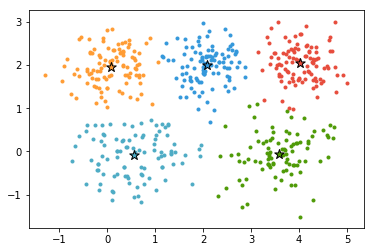

In [9]:
plot_clusters(mu, clusters)

In [11]:
within_clusters_sums_of_sq(mu, clusters)

222.3659877692911

# kmeans++ initialization

In [13]:
def kmeans_plus_init(X,K):
    mu = []
    mu.append(X[np.random.randint( 
            X.shape[0])])
    for i in range(K-1):
        dist = []
        for pt in X:
            d = np.Inf
            for mu_j in mu:
                temp = np.linalg.norm(pt- mu_j)**2
                d = min(d, temp)
            dist.append(d)
        p = dist/np.sum(dist)
        idx = np.random.choice(np.arange(0, X.shape[0]), p = dist/np.sum(dist))
        next_mu = X[idx]
        # dist = np.array(dist)
        # next_mu = X[np.argmax(dist)]
        mu.append(next_mu)
        dist = []
    return mu

In [14]:
def kmeans_plus(X, K):
    iterations = 0
    # kmeans++ initialization
    mu = kmeans_plus_init(X,K)
    oldmu = kmeans_plus_init(X,K)
    while not has_converged(mu, oldmu):
        iterations +=1
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return mu, clusters, iterations

In [15]:
mu, clusters, iterations = kmeans_plus(X, 5)
iterations

17

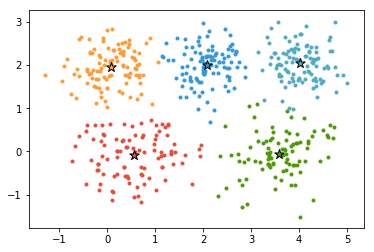

In [16]:
plot_clusters(mu, clusters)

# Experiments of 200 runs of kmeans and kmeans++

In [20]:
mus_kmeans = []
clusters_kmeans = []
sum_of_squares_kmeans = []
num_iterations_kmeans = []
mus_kmeansplus = []
clusters_kmeansplus = []
sum_of_squares_kmeansplus = []
num_iterations_kmeansplus = []
for k in range(200):
    # run kmeans
    mu, clusters, iterations = kmeans(X,5)
    # plot_clusters(mu, clusters)
    mus_kmeans.append(mu)
    clusters_kmeans.append(clusters)
    num_iterations_kmeans.append(iterations)
    sum_of_squares_kmeans.append(within_clusters_sums_of_sq(mu, clusters))
    
    # run kmeans++
    mu, clusters, iterations = kmeans_plus(X,5)
    # plot_clusters(mu, clusters)
    mus_kmeansplus.append(mu)
    clusters_kmeansplus.append(clusters)
    num_iterations_kmeansplus.append(iterations)
    sum_of_squares_kmeansplus.append(within_clusters_sums_of_sq(mu, clusters))

Analyze experiments results

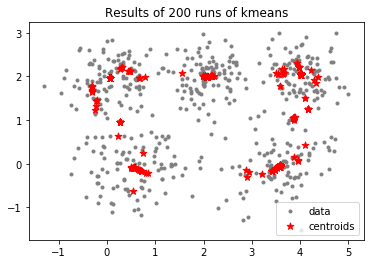

In [34]:
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], marker = '.',color = 'grey', label = 'data')
for mu in mus_kmeans:
    plt.scatter(np.array(mu)[:,0], np.array(mu)[:,1],marker = '*',s = 50, color = 'r')
plt.scatter(np.array(mu)[:,0], np.array(mu)[:,1],marker = '*',s = 50, color = 'r', label = 'centroids')
plt.title('Results of 200 runs of kmeans')
plt.legend()

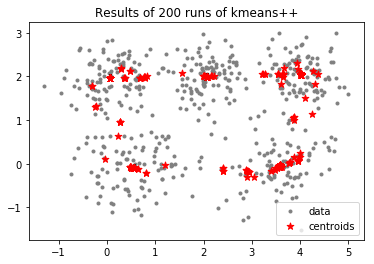

In [35]:
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], marker = '.',color = 'grey', label = 'data')
for mu in mus_kmeansplus:
    plt.scatter(np.array(mu)[:,0], np.array(mu)[:,1],marker = '*',s = 50, color = 'r')
plt.scatter(np.array(mu)[:,0], np.array(mu)[:,1],marker = '*',s = 50, color = 'r', label = 'centroids')
plt.title('Results of 200 runs of kmeans++')
plt.legend()

We compare the number of iterations to achieve convergence for kmeans and kmeans++. On average, kmeans takes 9.345 iterations and kmeans++ takes 7.57 iterations. This shows that kmeans++ is an effective initialization strategy that reduces the average iterations to achieve convergence.

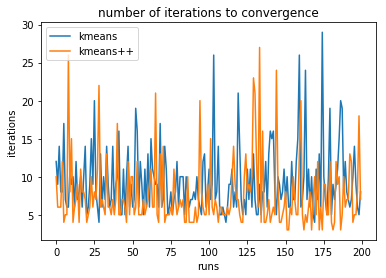

In [36]:
plt.plot(num_iterations_kmeans, label = 'kmeans')
plt.plot(num_iterations_kmeansplus, label = 'kmeans++')
plt.xlabel('runs')
plt.ylabel('iterations')
plt.title('number of iterations to achieve convergence')
plt.legend()

The statistics of the within-clusters sums-of-squares of the 200 runs using the two methods are summarized here.

| Methods | kmeans | kmeans++|
|---------|--------|---------|
|   min   | 222.36 | 222.36  |
|   mean  | 250.46 | 243.75  |
|   std   | 68.38  | 57.09   |

So kmeans results in smaller in the mean and standard deviation of the within-cluster sums-of-squares for the clustering.

In [37]:
sum(num_iterations_kmeans)/200

9.345

In [38]:
sum(num_iterations_kmeansplus)/200

7.57

In [39]:
min(sum_of_squares_kmeans)

222.3659877692911

In [40]:
import statistics
statistics.mean(sum_of_squares_kmeans)

250.46300899589343

In [42]:
statistics.pstdev(sum_of_squares_kmeans)

68.3770467048463

In [43]:
min(sum_of_squares_kmeansplus)

222.3659877692911

In [44]:
statistics.mean(sum_of_squares_kmeansplus)

243.75071884392906

In [45]:
statistics.pstdev(sum_of_squares_kmeansplus)

57.09153268015711